## Yedihilal Introduction to Machine Learning Summer School 2023

# Assignment 2
#### Due date: 23.59 Sunday, Agust 13

In [1]:
# Name: Yusuf Ali   
# Surname: Gundogdu

In [3]:
# This cell generates data used in Part 1 and 2. Please do not change here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)

def polynomial(values, coeffs):
    # Coeffs are assumed to be in order 0, 1, ..., n-1
    expanded = np.column_stack([coeffs[i] * (values ** i) for i in range(0, len(coeffs))])
    return np.sum(expanded, axis=-1)

def polynomial_data(coeffs, n_data=100, x_range=[-1, 1], eps=0.1):
    x = np.random.uniform(x_range[0], x_range[1], n_data)
    poly = polynomial(x, coeffs)
    return x.reshape([-1, 1]), np.reshape(poly + eps * np.random.randn(n_data), [-1, 1])


# 1 + 0.5 * x - 0.5 x^2 - 0.2 x^3 - 0.W1 x^4
coeffs = [1, 0.5, -0.5, -0.2, -0.1]
X, y = polynomial_data(coeffs, 100, [90, 110], 200)

### Data Splitting

Split data into training and test datasets with the test ratio of 33% and random_state=0 using Scikit-learn library

In [4]:
'''split_data = int(0.33 * len(X))
training_data = np.array(X)[split_data:]
test_data = np.array(X)[:split_data]
y_split_data = int(0.33 * len(y))
y_training_data = np.array(y)[split_data:]
y_test_data = np.array(y)[:split_data]'''
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)



In [5]:
X_train.mean(), X_test.mean(), y_train.mean(), y_test.mean()

(100.46310135440625, 97.41090570544898, -10589212.35646485, -9366686.73739685)

### Data Preprocessing: Scaling

Transform the data to have zero mean and unit variance.

In [6]:
'''X -= X.mean()
X /= X.std()
y -= y.mean()
y /= y.std()
training_data -= training_data.mean()
training_data /= training_data.std()
test_data -= test_data.mean()
test_data /= test_data.std()
y_training_data -= y_training_data.mean()
y_training_data /= y_training_data.std()
y_test_data -= y_test_data.mean()
y_test_data /= y_test_data.std()
plt.scatter(X, y)'''
scaler = StandardScaler()
scaler.fit(X_train)
def data_scaler(data,scale):
    return scale.transform(data)

X_train_scaled = data_scaler(X_train, scaler)
X_test_scaled = data_scaler(X_test, scaler)

scaler_y = StandardScaler()
scaler_y.fit(y_train)

y_train_scaled = data_scaler(y_train, scaler_y)
y_test_scaled = data_scaler(y_test, scaler_y)

In [7]:
X_train_scaled.mean(),X_test_scaled.mean(),y_train_scaled.mean(), y_test_scaled.mean()

(1.5228282979559983e-15,
 -0.5392418271799311,
 -1.5518266605394912e-15,
 0.5270672005653707)

## Linear Regression Model Implementation with Gradient Descent

The model function for linear regression, which is a function that maps from `x` to `y` is represented as:
**$$f_{w,b}(x) = wx + b$$**
 To train a linear regression model, We want to find the best $(w,b)$ parameters that fit our dataset.
 
## Forward Pass
The forward method computes the linear regression output for the input data X using the current weights and biases.

## Loss (Cost) Function
The loss function is used to evaluate the performance of the model. The compute_loss method computes the loss of the linear regression model using the predicted values and actual values. The loss function is given by:

$$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m}(f_{w,b}(x^{(i)}) - y^{(i)})^2$$

where m is the number of training examples, x is the input data, y is the actual output, and w and b are the weights and biases respectively.

## Backward Pass
The backward method computes the gradients of the weights and biases using the predicted values and actual values. The gradients are used to update the weights and biases during training.

$$
\frac{\partial J(w,b)}{\partial b}^{}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \ (f_{w,b}(X^{}) - y^{}) 
$$
$$
\frac{\partial J(w,b)}{\partial w}^{}  =  \frac{1}{m} \sum\limits_{i = 0}^{m-1}\ (f_{w,b}(X^{}) -y^{})X^{} 
$$

## Training
The fit method trains the linear regression model for the specified number of iterations using the input data X and actual values y. The method computes the forward pass, computes the cost function, computes the backward pass, and updates the weights and biases. Optionally, it plots the cost function for each iteration. Where updating parameter equations are given by:
 
$$W \leftarrow W - \alpha \frac{\partial J}{\partial W}$$
$$b \leftarrow b - \alpha \frac{\partial J}{\partial b}$$



In [8]:
X_train_scaled.shape

(67, 1)

In [9]:
class LRwithGradientDecent:
    def __init__(self, lr):
        """
        Initializes the class instance with the specified learning rate

        Parameters:
            lr (float): The learning rate used in gradient descent.
        """
        # TODO: Your code here
        self.lr = float(lr)
        
    def initialize_parameters(self):
        if self.X.ndim ==1:
             self.W = 0
        else:
            self.W = self.W = np.random.randn(self.X.shape[-1]) * np.sqrt(2 / (self.X.shape[-1] + 1))

        self.b = 0
        
    def forward(self, X):
        """
        Computes the linear regression output for the input data `X` using the current weights and biases.

        Parameters:
            X (numpy array): The input data.

        Returns:
            Z (numpy array): The output of the linear regression model.
        """

        # TODO: Your code here
        Z = np.dot(X,self.W) + self.b
        Z = Z.reshape(-1, 1)
        return Z
    
    def compute_loss(self, preds, y):
        """
        Computes the loss of the linear regression model using the predicted values and actual values.

        Parameters:
            preds (numpy array): The predicted values.
            y (numpy array): The actual values.

        Returns:
            loss (float): The loss of the linear regression model.
        """

        # TODO: Your code here
        loss = np.sum((preds - y) ** 2) / len(self.y)
        return loss

    def backward(self, preds):
        """
        Computes the gradients of the weights and biases using the predicted values and actual values for self.X

        Parameters:
            preds (numpy array): The predicted values.
        """

        # TODO: Complete the following statements (and delete the comment symbols).
        self.db = 1/len(self.y) * np.sum(preds - self.y)
        self.dW = 1/len(self.y) * np.sum((preds - self.y) * self.X)
    
    def update(self):
        """
        Updates self.W and self.b based on the current gradient values
        """
        # TODO: Your code here
        self.W -= self.lr * self.dW
        self.b -= self.lr * self.db

    def fit(self, X, y, n_iter, plot_cost=True):
        """
        Trains the linear regression model for the specified number of iterations using the input data `X` and actual values `y`. 
        Optionally, plots the cost function for each iteration.

        Parameters:
            X (numpy array): The input data.
            y (numpy array): The actual values.
            n_iter (int): The number of iterations to train the model for.
            plot_cost (bool, optional): Whether to plot the cost function for each iteration. Defaults to True.
        """
        loss_values = []       
        self.X = X
        self.y = y
        self.initialize_parameters()
        

        # TODO: Implement the following.
        
        # repeat the following process n_iter times
            
        #1) apply forward pass
        
        #2) calculate the loss at the current iterations and append it to loss_values
        
        #3) apply backward pass

        #4) update the parameters

        #5) print the cost at each 100 iteration

        
        #visualize loss_values using a line plot after the training

        # TODO: Your code here
        for i in range(n_iter):
            y_forward = self.forward(X)
            loss = self.compute_loss(y_forward, y)
            loss_values.append(loss)
            self.backward(y_forward)
            self.update()
            
            if (i + 1) % 100 == 0:
                print(loss)
        plt.plot(range(len(loss_values)), loss_values, marker='o')

    def predict(self, X):
        """
        Computes the predicted values for the input data `X` using the current weights and biases.

        Parameters:
            X (numpy array): The input data.

        Returns:
            preds (numpy array): The predicted values for the input data X.
        """
     
        # TODO: Your code here
        preds = np.dot(X,self.W) + self.b
        preds = preds.reshape(-1, 1)
        return preds

### Training Linear Regression with Gradient Descent

Fit a linear regressor using LRwithGradientDecent class on the training dataset

Try a list of lr (at most 0.1) and a list of num_iter values (num_iter=2000 at most) for the training.

0.006341591041820827
0.006341590681897927
0.0063415906818979255
0.006341590681897926
0.006341590681897926
0.006341590681897926
0.006341590681897926
0.006341590681897926
0.0063415906818979255
0.006341590681897926
0.006341590681897926
0.006341590681897926
0.006341590681897926
0.0063415906818979255
0.006341590681897926
0.006341590681897926
0.006341590681897926
0.006341590681897926
0.0063415906818979255
0.006341590681897926


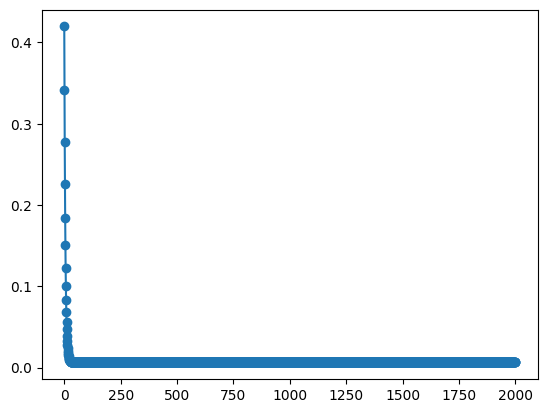

In [10]:
# TODO: Your code here
s = LRwithGradientDecent(0.1)
s_fitted = s.fit(X_train_scaled, y_train_scaled, 2000)

### Evaluation

Evaluate the model on the training data and test data

In [11]:
# TODO: Your code here
def evaluate_data():
    Z = s.forward(X_train_scaled)
    return np.mean((Z - y_train_scaled) ** 2)
print(evaluate_data())
#s.fit(training_data, test_data, 2000)

0.006341590681897926


### Scikit-learn Linear Regression

Train a linear regressor using sklearn library and compare its performance with your LinearRegression.

In [12]:
# TODO: Your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear_model_fit = LinearRegression().fit(X_train_scaled, y_train_scaled)

sckit_linear_model = linear_model_fit.predict(X_test_scaled)
custom_linear_model = s.predict(X_test_scaled)

mse_sckit_linear = mean_squared_error(sckit_linear_model, y_test_scaled)
mse_custom_linear = mean_squared_error(y_test_scaled,custom_linear_model)
"LRwithGradientDecent mean square error: ",mse_custom_linear,"Sklearn mean square error: ",mse_sckit_linear

('LRwithGradientDecent mean square error: ',
 0.006748592478078698,
 'Sklearn mean square error: ',
 0.006748592478078747)

In [13]:
linear_model_fit.score(custom_linear_model, y_test_scaled), linear_model_fit.score(-sckit_linear_model,y_test_scaled)

(-4.398152618445079, 0.992428552032752)

### Visualization

Plot the training data (scatter plot) and the fitted lines by LRwithGradientDecent and LinearRegression (with different colored line plots) in a single figure.

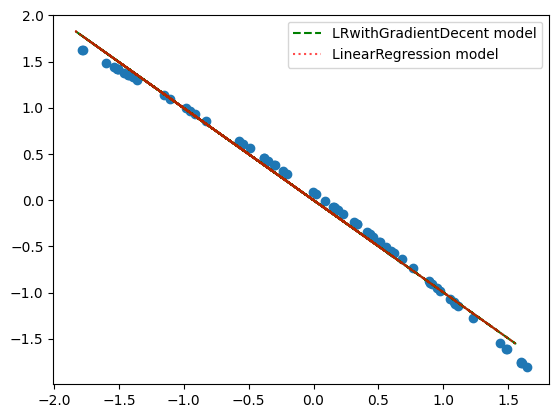

In [14]:
# TODO: Your code here
#y_LRwithGradientDecent = s.fit(X, y, 2000)
#sckit_linear_train = linear.predict(X_train_scaled)
#custom_linear_train = s.predict(X_train_scaled)
plt.scatter(X_train_scaled,y_train_scaled)
plt.plot(X_test_scaled, custom_linear_model, color ="green",label = "LRwithGradientDecent model",linestyle = "dashed")
plt.plot(X_test_scaled,sckit_linear_model, color = "Red", label = "LinearRegression model",linestyle = "dotted", alpha=0.7)
plt.legend()
#plt.plot(X, y)
plt.show()


Plot the test data (scatter plot) and the fitted lines by LRwithGradientDecent and LinearRegression (with different colored line plots) in a single figure.

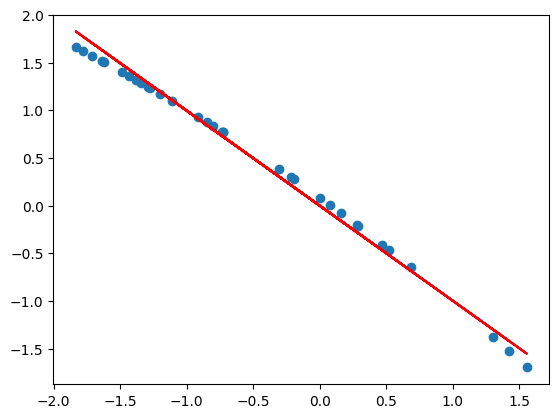

In [15]:
# TODO: Your code here
plt.scatter(X_test_scaled, y_test_scaled)
plt.plot(X_test_scaled,custom_linear_model, color ="blue")
plt.plot(X_test_scaled, sckit_linear_model, color = "Red")
#plt.plot(X, y_LRwithGradientDecent)
plt.show()

## Part 2: Polynomial Regression

Fit 2-degree, 4-degree, 8-degree polynomial regression models using only Scikit-learn library.

In [16]:
from sklearn.preprocessing import PolynomialFeatures
linear = LinearRegression()
def polynomial_regression(i):
    poly_func = PolynomialFeatures(i)
    poly_func.fit(X_train_scaled)
    X_poly = poly_func.transform(X_train_scaled)
    X_poly_test = poly_func.transform(X_test_scaled)
    linear.fit(X_poly,y_train_scaled)
    Z = linear.predict(X_poly_test)
    return Z
poly_reg_two = polynomial_regression(2)
poly_reg_four = polynomial_regression(4)
poly_reg_eight = polynomial_regression(8)

Evaluate the models on the training data and test data and write a comment which is the best model.

In [17]:
loss_two = mean_squared_error(poly_reg_two, y_test_scaled)
loss_four = mean_squared_error(poly_reg_four, y_test_scaled)
loss_eight = mean_squared_error(poly_reg_eight, y_test_scaled)
loss_two, loss_four, loss_eight
#four degree polynomial contains the smallest loss. So is the best one 

(8.169239087398448e-06, 7.741163840389164e-09, 7.91624039265234e-09)

Visualize the test data (scatter plot) and the predictions of three polynomial models (different colored line plots) in a single figure.

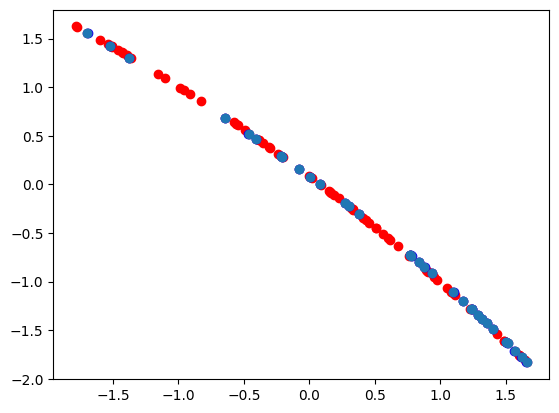

In [18]:
plt.scatter(X_train_scaled,y_train_scaled, color = "red")
plt.scatter(poly_reg_two,X_test_scaled, color = "blue")
plt.scatter(poly_reg_four,X_test_scaled, color = "purple")
plt.scatter(poly_reg_eight,X_test_scaled)
plt.show()

## Part 3: Regularized Linear Regression


In [19]:
#data_Xy = np.hstack((X, y))
#data_Xy = pd.DataFrame(data_Xy, columns=["X", "y"])
#data_Xy.to_csv("data.csv",index = False)

Read 'data.csv'.

Drop the column 'y' from the dataframe to obtain input data X.

Get the column 'y' from the dataframe to obtain target data y.

Split data (X,y) into training and test datasets with the test ratio of 25% and random_state=0 using Scikit-learn library.

Transform the data to have zero mean and unit variance.

In [58]:
# TODO: Your code here
data_f = pd.read_csv('data.csv')
data_f_X = data_f.drop(columns = ["y"])
data_f_y = data_f["y"]
X_training, X_testing, y_training, y_testing = train_test_split(data_f_X, data_f_y, test_size=0.25, random_state=0)
X_training_upd = StandardScaler().fit_transform(X_training)
X_testing_upd = StandardScaler().fit_transform(X_testing)

Train a Linear Regression model.

In [54]:
# TODO: Your code here
linear_regression = LinearRegression()

Find the classes for linear regression models with L1 and L2 Loss on https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model and import them from sklearn. 
Please, read the class descriptions to learn class parameters and to accomplish this part correctly.

Set the regularization constant for training L1 model to 0.01.

Set the regularization constant for training L2 model to 0.7.

In [66]:
# TODO: Your code here
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
regr_elastic = ElasticNet(alpha=0.7, l1_ratio=0.01, max_iter=2000)
regr_elastic.fit(X_training, y_training)
regr_pred_elastic = regr_elastic.predict(X_testing)

lasso_reg = Lasso(alpha=0.01,max_iter = 2000)
lasso_reg.fit(X_training, y_training)
y_pred_lasso = lasso_reg.predict(X_testing)

ridge_reg = Ridge(alpha=0.7,max_iter=2000)
ridge_reg.fit(X_training, y_training)
y_pred_ridge = ridge_reg.predict(X_testing)

Import the corresponding function from Scikit-learn library for R-squared metric.

Evaluate the performance of three models based on R-squared and comment which is the best model.

In [67]:
# TODO: Your code here
from sklearn.metrics import r2_score
r2_score(y_testing, y_pred_ridge),r2_score(y_testing, y_pred_lasso),r2_score(y_testing,regr_pred_elastic)
#lasso is the best one

(0.7616107422047248, 0.7658959948224928, 0.3084774565846603)